# Лабораторна робота №1
Тема: Дослідження та візуалізація даних за допомогою Python

Мета: отримати базові навики використання Python для дослідження та
візуалізації даних.

### Визначення варіанту

In [9]:
FIRST_LETTER_OF_MY_NAME = "M"

print("Mій варіант:", ord(FIRST_LETTER_OF_MY_NAME) % 3 + 1)

Mій варіант: 3


### Варіант 3. Дослідження втрат бронетранспортерів (БТР).
1. Створіть функцію, яка приймає назву файлу та назву стовпця як
параметр та повертає масив numpy зі значеннями стовпця.

In [10]:
import kagglehub
import csv
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download(
    "piterfm/2022-ukraine-russian-war", "russia_losses_equipment.csv"
)


class LossesTable:
    def __init__(self, path: str):
        self.data_table = self.read_data(path)

    def read_data(self, file_path: str) -> np.ndarray:
        if not os.path.exists(file_path):
            raise FileNotFoundError()

        with open(file_path, "r", encoding="utf-8") as file:
            reader = csv.reader(file)

            return np.array(list(reader))

    def get_column_of_data(
        self,
        column_name: str,
        from_date: datetime = None,
        till_date: datetime = None,
    ) -> np.ndarray:
        headers = self.data_table[0]

        if column_name not in headers:
            raise ValueError(f"Column '{column_name}' not found in headers.")
        index = headers.tolist().index(column_name)
        data = []

        for row in self.data_table[1:]:
            if from_date is not None:
                date = datetime.datetime.strptime(row[0], "%Y-%m-%d")
                if date < from_date:
                    continue
            if till_date is not None:
                date = datetime.datetime.strptime(row[0], "%Y-%m-%d")
                if date > till_date:
                    continue

            data.append(row[index] or None)
        return np.array(data)

    def get_APC(self, from_date: datetime = None, till_date: datetime = None):
        return np.array(
            list(map(int, self.get_column_of_data("APC", from_date, till_date)))
        )

    def get_dates(self, from_date: datetime = None, till_date: datetime = None):
        return np.array(
            list(
                map(
                    lambda data: datetime.datetime.strptime(data, "%Y-%m-%d"),
                    self.get_column_of_data("date", from_date, till_date),
                )
            )
        )


losses = LossesTable(path)

2. Використовуючи функцію з попереднього завдання, створіть масив
numpy зі значень стовпця «APC» (Armored personnel carrier).

In [11]:
APC = losses.get_APC()


print("APC:", APC)

APC: [18726 18697 18661 18612 18592 18581 18538 18523 18487 18470 18450 18433
 18404 18395 18355 18332 18287 18254 18229 18199 18175 18111 18072 18053
 18002 17969 17939 17895 17876 17827 17800 17765 17751 17740 17710 17679
 17658 17627 17596 17579 17547 17503 17476 17438 17396 17344 17304 17292
 17252 17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955
 16938 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736
 16722 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495
 16480 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323
 16294 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050
 16039 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811
 15779 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566
 15550 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337
 15319 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105
 15096 15076 15036 15020 15002 14980 14947 149

3. Знайдіть добові втрати БТР.

In [12]:
def get_daily_losses(APC: np.ndarray) -> np.ndarray:
    return -np.diff(APC)

daily_apc_losses = get_daily_losses(APC)

print("Daily APC losses: ", daily_apc_losses)

Daily APC losses:  [ 29  36  49  20  11  43  15  36  17  20  17  29   9  40  23  45  33  25
  30  24  64  39  19  51  33  30  44  19  49  27  35  14  11  30  31  21
  31  31  17  32  44  27  38  42  52  40  12  40  30  52  38  39  13   3
   6   8  20  40  48  17  13  19   9  19   0   9  21  27  35  26  24  14
  23  18  14  19  17  11  21  32  25  21  26  15   7  12  35  24  17  17
   5  13   9   9   9  29   8  31  17  27   8  42  20  38   8  21  24  11
  26  13  20  17  46  15  19  12   9  36  15  32  24  23  17  11  19  40
  16  18  11  17  17  16  26  19  25  21   9  19  18  15  15  11  35  18
  12  20  18   6  29  26  21  11  32  13  26   9  20  40  16  18  22  33
  12  22  22  33  40  15  17  11  27  27  22  34  35  35  43  14  30  48
  43  42  22  40  32  35  19  14  34  23  27  33  29  21  39  16  20  14
  15  14  12  12   8  23  21  17   8  18  13  31  20  47  19  12  47  45
  24  54  38  73  18  18  29  17  20  20  27  21   9  24  25  28  19  37
  16   9  35  17  24  24  11  17

4. Знайдіть 5 найбільших добових втрат БТР.

In [13]:
def get_top_5_daily_losses(daily_apc_losses: np.ndarray) -> np.ndarray:
    return np.sort(daily_apc_losses)[-5:]
  
print("Top 5 daily losses: ", get_top_5_daily_losses(daily_apc_losses))

Top 5 daily losses:  [ 91  96 110 120 190]


5. Визначте, скільки БТР було знищено влітку 2023 року.

In [14]:
def get_total_apc_losses(APC: np.ndarray) -> np.ndarray:
    return np.sum(get_daily_losses(APC))


print("Total summer 2023 APC losses: ", get_total_apc_losses(losses.get_APC(datetime.datetime(2023, 6, 1), datetime.datetime(2023, 8, 31))))

Total summer 2023 APC losses:  1126


6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.


In [15]:
def get_average_apc_losses(APC: np.ndarray) -> np.ndarray:
    return np.mean(get_daily_losses(APC))


print(
    "Average APC losses from days 100 to 500: ",
    get_average_apc_losses(
        losses.get_APC(datetime.datetime(2022, 6, 4), datetime.datetime(2023, 7, 9))
    ),
)

Average APC losses from days 100 to 500:  11.4625


7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої
дати в наборі даних)

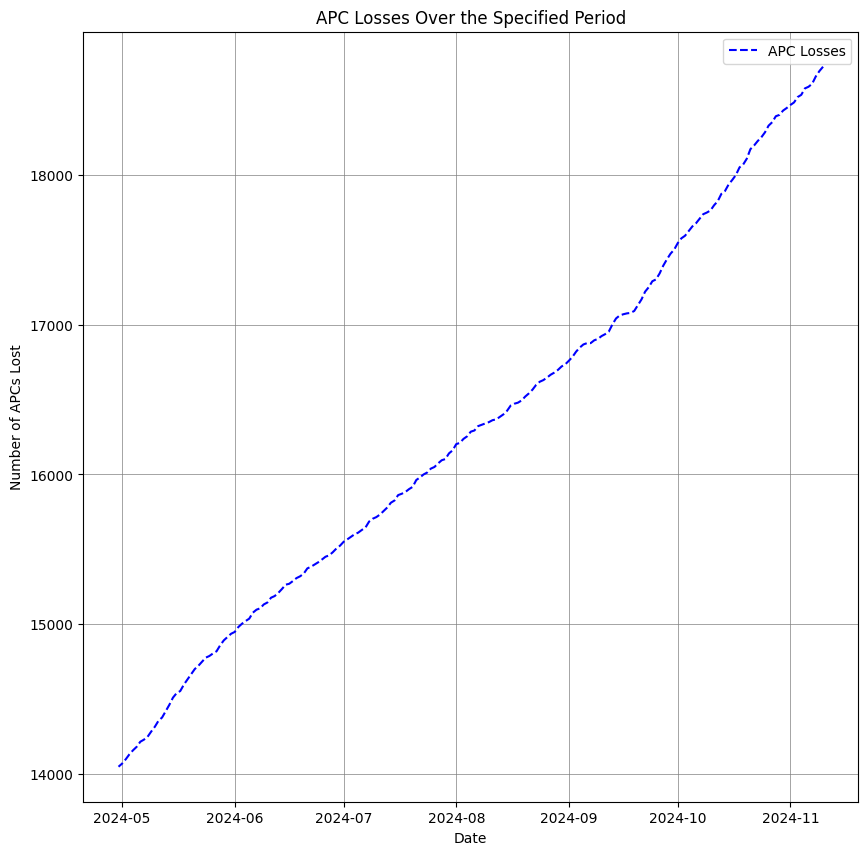

In [16]:
def get_losses_graph(from_date: datetime = None, till_date: datetime = None):
    data = losses.get_APC(from_date, till_date)
    dates = losses.get_dates(from_date, till_date)
    
    plt.figure(figsize=(10, 10), dpi=100)
    plt.plot(dates, data, linestyle="--", color="blue", label="APC Losses")

    plt.title("APC Losses Over the Specified Period")
    plt.xlabel("Date")
    plt.ylabel("Number of APCs Lost")
    plt.legend()
    plt.grid(color="gray", linestyle="-", linewidth=0.5)
    
    return plt


losses_for_last_200_days = get_losses_graph(
    datetime.datetime.now() - datetime.timedelta(days=200)
)

losses_for_last_200_days.savefig("apc_losses_last_200_days.png", format="png")
losses_for_last_200_days.show()

### Висновок

У ході виконання лабораторної роботи №1 було досягнуто мету – здобуто базові навички використання Python для дослідження та візуалізації даних. Було опрацьовано основні методи обробки даних за допомогою бібліотек, таких як Pandas, а також інструменти для візуалізації, зокрема Matplotlib та Seaborn.

У результаті роботи вдалося:

- освоїти основні прийоми роботи з наборами даних, включаючи завантаження, фільтрацію та аналіз;
- створити наочні графічні візуалізації для демонстрації закономірностей у даних;
- зрозуміти важливість грамотного оформлення візуалізацій для подальшого аналізу та інтерпретації;
- закласти фундамент для подальшого вивчення методів аналізу та обробки даних за допомогою Python.